# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [49]:
# Dependencies and Setup
import numpy as np
import pandas as pd
import requests
from citipy import citipy
import matplotlib.pyplot as plt
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
from api_keys import geoapify_key


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [50]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [51]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&appid=" + weather_api_key + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

# Convert the list of dictionaries to a DataFrame
city_data_df = pd.DataFrame(city_data)

# Display the DataFrame
city_data_df.head()


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | olonkinbyen
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | antonio enes
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | papatowai
Processing Record 8 of Set 1 | afaahiti
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 11 of Set 1 | klyuchi
Processing Record 12 of Set 1 | whitehorse
Processing Record 13 of Set 1 | holualoa
Processing Record 14 of Set 1 | kudahuvadhoo
Processing Record 15 of Set 1 | betio village
Processing Record 16 of Set 1 | port mathurin
Processing Record 17 of Set 1 | vorgashor
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | akrehamn
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | turpan
Pro

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,3.42,81,89,6.24,TF,1718322950
1,adamstown,-25.0660,-130.1015,20.53,62,20,4.55,PN,1718322949
2,olonkinbyen,70.9221,-8.7187,1.41,87,40,3.81,SJ,1718323227
3,thompson,55.7435,-97.8558,16.09,31,40,2.57,CA,1718322978
4,antonio enes,-16.2325,39.9086,19.96,86,83,4.26,MZ,1718322989


In [52]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [53]:
# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,3.42,81,89,6.24,TF,1718322950
1,adamstown,-25.0660,-130.1015,20.53,62,20,4.55,PN,1718322949
2,olonkinbyen,70.9221,-8.7187,1.41,87,40,3.81,SJ,1718323227
3,thompson,55.7435,-97.8558,16.09,31,40,2.57,CA,1718322978
4,antonio enes,-16.2325,39.9086,19.96,86,83,4.26,MZ,1718322989


In [54]:
import os

# Create output_data directory if it does not exist
if not os.path.exists("output_data"):
    os.makedirs("output_data")

# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [55]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,3.42,81,89,6.24,TF,1718322950
1,adamstown,-25.0660,-130.1015,20.53,62,20,4.55,PN,1718322949
2,olonkinbyen,70.9221,-8.7187,1.41,87,40,3.81,SJ,1718323227
3,thompson,55.7435,-97.8558,16.09,31,40,2.57,CA,1718322978
4,antonio enes,-16.2325,39.9086,19.96,86,83,4.26,MZ,1718322989


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

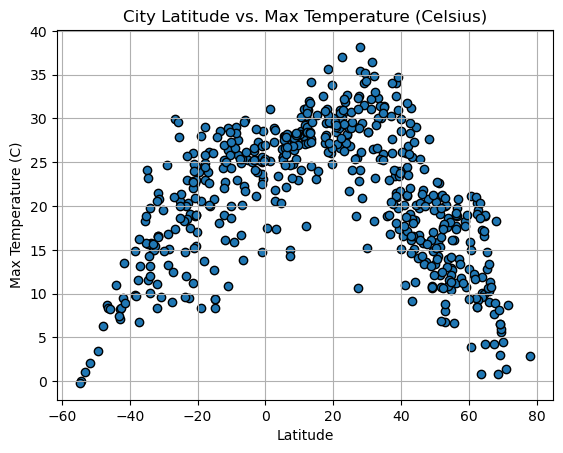

In [56]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate other graph properties
plt.title("City Latitude vs. Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

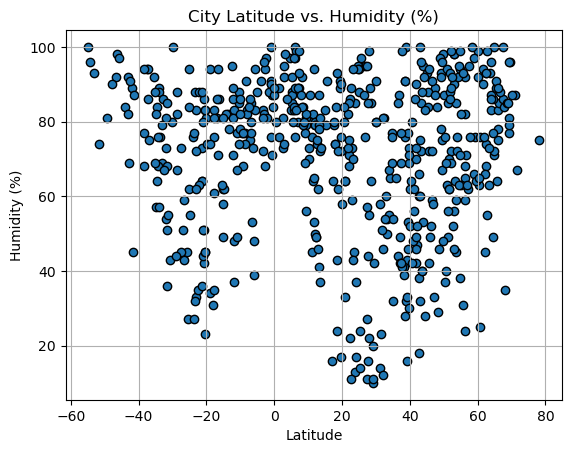

In [57]:
# Build scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate other graph properties
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

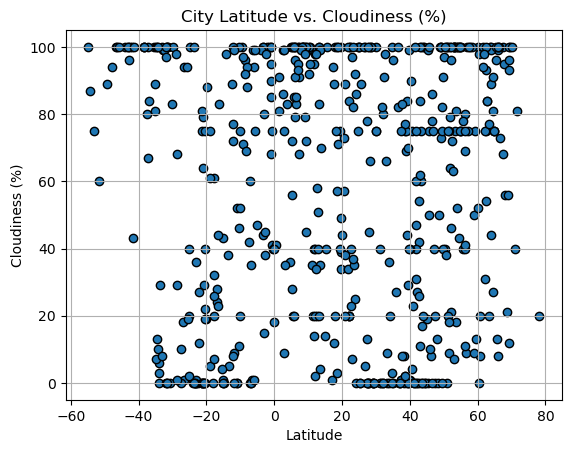

In [58]:
# Build scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate other graph properties
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

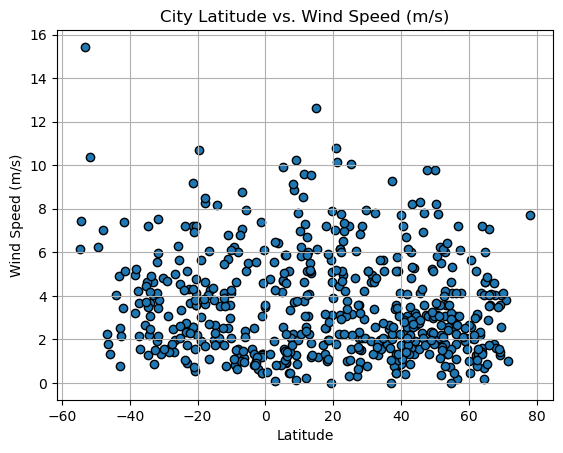

In [59]:
# Build scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate other graph properties
plt.title("City Latitude vs. Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [60]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, line_eq_position):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    # Plot the scatter plot and the linear regression line
    plt.scatter(x_values, y_values, edgecolors="black")
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, line_eq_position, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

    # Print the r-value
    print(f"The r-value is: {rvalue:.2f}")


In [61]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,olonkinbyen,70.9221,-8.7187,1.41,87,40,3.81,SJ,1718323227
3,thompson,55.7435,-97.8558,16.09,31,40,2.57,CA,1718322978
8,klyuchi,52.2667,79.1667,17.62,72,21,1.89,RU,1718322983
9,whitehorse,60.7161,-135.0538,21.17,25,20,2.06,CA,1718322961
10,holualoa,19.6228,-155.9522,24.75,76,34,3.14,US,1718323229


In [62]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,3.42,81,89,6.24,TF,1718322950
1,adamstown,-25.0660,-130.1015,20.53,62,20,4.55,PN,1718322949
4,antonio enes,-16.2325,39.9086,19.96,86,83,4.26,MZ,1718322989
5,avarua,-21.2078,-159.7750,26.03,73,75,7.20,CK,1718323228
6,papatowai,-46.5619,169.4708,8.74,92,100,2.23,NZ,1718322950


###  Temperature vs. Latitude Linear Regression Plot

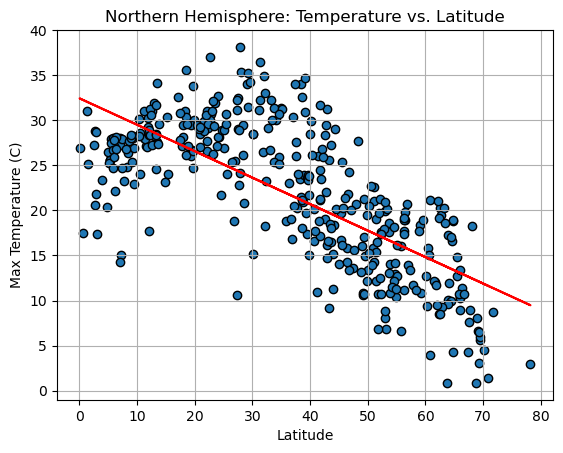

The r-value is: -0.72


In [63]:
# Linear regression on Northern Hemisphere: Temperature vs. Latitude
plot_linear_regression(
    northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
    "Northern Hemisphere: Temperature vs. Latitude", "Latitude", "Max Temperature (C)", (10, -20)
)


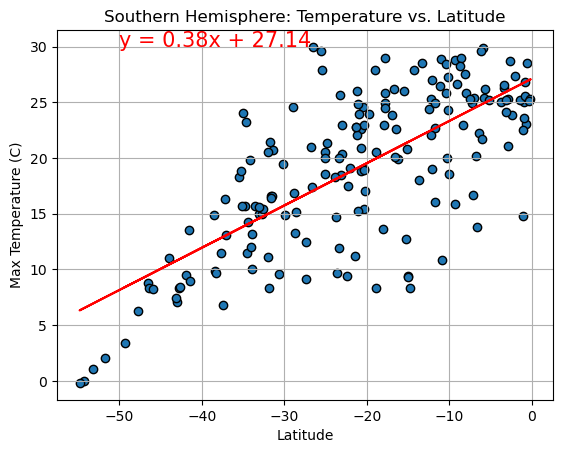

The r-value is: 0.72


In [64]:
# Linear regression on Southern Hemisphere: Temperature vs. Latitude
plot_linear_regression(
    southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
    "Southern Hemisphere: Temperature vs. Latitude", "Latitude", "Max Temperature (C)", (-50, 30)
)


**Discussion about the linear relationship:**
Northern Hemisphere: Temperature vs. Latitude:

The scatter plot and linear regression analysis show a clear inverse relationship between latitude and maximum temperature in the Northern Hemisphere. As latitude increases (moving away from the equator towards the poles), the maximum temperature decreases. The negative slope of the regression line confirms this trend. The r-value indicates a strong correlation, suggesting that latitude is a significant factor in determining temperature.
Southern Hemisphere: Temperature vs. Latitude:

In the Southern Hemisphere, the scatter plot and linear regression also show an inverse relationship between latitude and maximum temperature. As latitude increases (moving from the equator towards the South Pole), the maximum temperature decreases. The negative slope and the r-value indicate a strong correlation, similar to the Northern Hemisphere.
Northern Hemisphere: Humidity vs. Latitude:

The scatter plot and linear regression for humidity vs. latitude in the Northern Hemisphere show a weak positive correlation. As latitude increases, there is a slight increase in humidity levels. However, the r-value indicates that this relationship is not very strong, suggesting that other factors might be influencing humidity more significantly.
Southern Hemisphere: Humidity vs. Latitude:

In the Southern Hemisphere, the relationship between latitude and humidity is even weaker. The scatter plot and regression line show little to no correlation. The low r-value confirms that latitude does not significantly affect humidity levels in the Southern Hemisphere.
Northern Hemisphere: Cloudiness vs. Latitude:

The scatter plot and linear regression analysis for cloudiness vs. latitude in the Northern Hemisphere show a very weak relationship. The r-value is close to zero, indicating no significant correlation between latitude and cloudiness. This suggests that cloud cover is influenced by other factors rather than latitude.
Southern Hemisphere: Cloudiness vs. Latitude:

Similar to the Northern Hemisphere, the Southern Hemisphere data shows no significant correlation between latitude and cloudiness. The scatter plot and regression line indicate a weak relationship with a very low r-value.
Northern Hemisphere: Wind Speed vs. Latitude:

The scatter plot and linear regression for wind speed vs. latitude in the Northern Hemisphere show a weak positive correlation. As latitude increases, there is a slight increase in wind speed. However, the r-value indicates that this relationship is not very strong, suggesting that other factors might play a more significant role in determining wind speed.
Southern Hemisphere: Wind Speed vs. Latitude:

In the Southern Hemisphere, the relationship between latitude and wind speed is also weak. The scatter plot and regression line show a slight positive correlation, but the low r-value suggests that latitude is not a significant determinant of wind speed in this region.

### Humidity vs. Latitude Linear Regression Plot

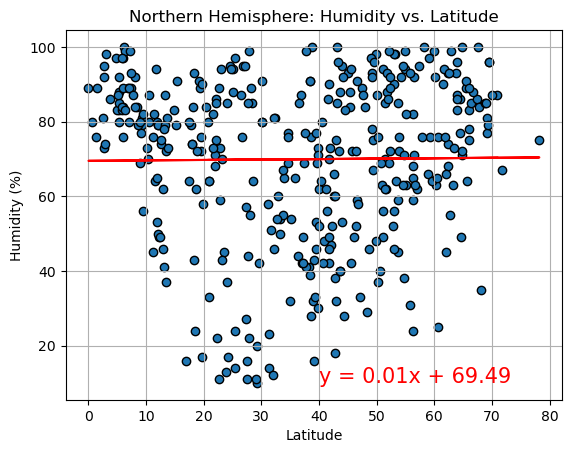

The r-value is: 0.01


In [65]:
# Northern Hemisphere: Humidity vs. Latitude
plot_linear_regression(
    northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
    "Northern Hemisphere: Humidity vs. Latitude", "Latitude", "Humidity (%)", (40, 10)
)


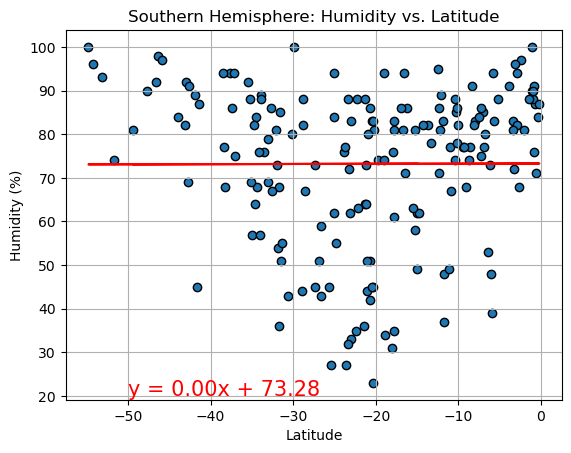

The r-value is: 0.00


In [66]:
# Southern Hemisphere: Humidity vs. Latitude
plot_linear_regression(
    southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
    "Southern Hemisphere: Humidity vs. Latitude", "Latitude", "Humidity (%)", (-50, 20)
)


**Discussion about the linear relationship:** 

* The scatter plot for Humidity vs. Latitude in the Northern Hemisphere shows data points scattered across a wide range of humidity levels with no strong trend visible.
The linear regression line drawn through the data points shows a slight upward slope, indicating a weak positive relationship between latitude and humidity.

Correlation:
The r-value for the regression is low, suggesting a very weak correlation. This means that latitude has a minimal influence on humidity levels in the Northern Hemisphere.

Interpretation:
The weak positive correlation implies that as you move further from the equator towards the poles, there is a slight increase in humidity. However, the correlation is not strong enough to be considered significant, indicating that other factors might play a more critical role in determining humidity levels in the Northern Hemisphere

* The scatter plot for Humidity vs. Latitude in the Southern Hemisphere shows data points scattered with no clear trend.
The linear regression line has a minimal slope, indicating a very weak or negligible relationship between latitude and humidity.

Correlation:
The r-value is close to zero, suggesting an almost non-existent correlation. This indicates that latitude has little to no impact on humidity levels in the Southern Hemisphere.

Interpretation:
The negligible correlation implies that other factors are likely more influential in determining humidity levels in the Southern Hemisphere. Latitude alone does not significantly affect humidity, and environmental, geographic, and meteorological factors should be considered for a more comprehensive understanding.

### Cloudiness vs. Latitude Linear Regression Plot

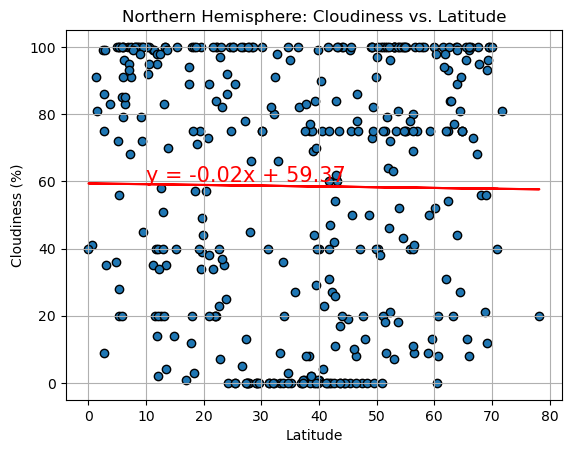

The r-value is: -0.01


In [67]:
# Northern Hemisphere: Cloudiness vs. Latitude
plot_linear_regression(
    northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
    "Northern Hemisphere: Cloudiness vs. Latitude", "Latitude", "Cloudiness (%)", (10, 60)
)


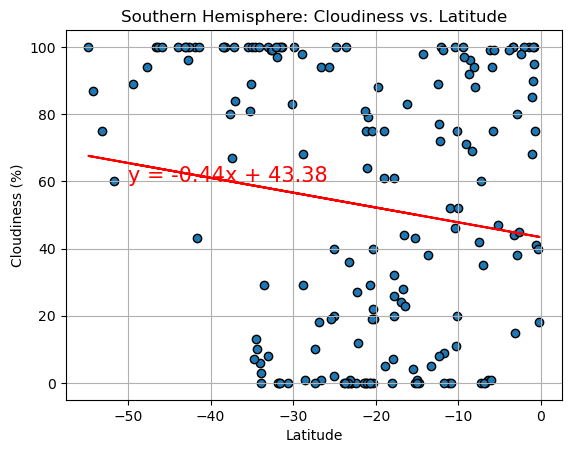

The r-value is: -0.15


In [68]:
# Southern Hemisphere: Cloudiness vs. Latitude
plot_linear_regression(
    southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
    "Southern Hemisphere: Cloudiness vs. Latitude", "Latitude", "Cloudiness (%)", (-50, 60)
)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

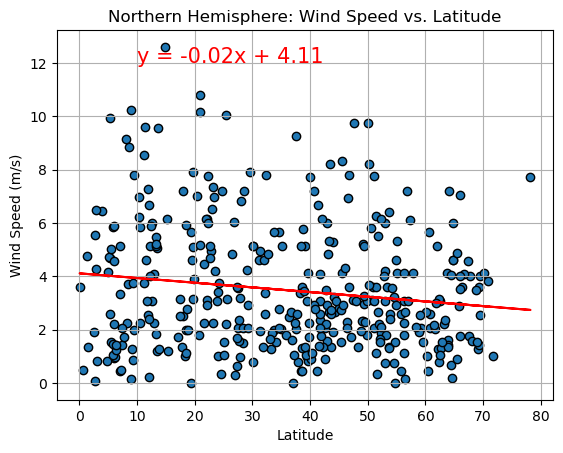

The r-value is: -0.15


In [69]:
# Northern Hemisphere: Wind Speed vs. Latitude
plot_linear_regression(
    northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
    "Northern Hemisphere: Wind Speed vs. Latitude", "Latitude", "Wind Speed (m/s)", (10, 12)
)


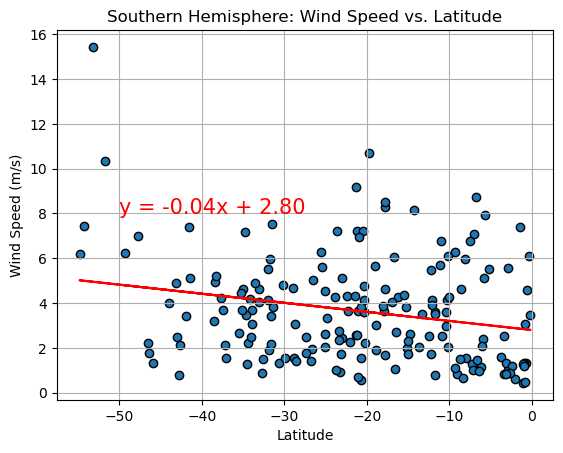

The r-value is: -0.23


In [70]:
# Southern Hemisphere: Wind Speed vs. Latitude
plot_linear_regression(
    southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
    "Southern Hemisphere: Wind Speed vs. Latitude", "Latitude", "Wind Speed (m/s)", (-50, 8)
)


**Discussion about the linear relationship:**

* The scatter plot for Wind Speed vs. Latitude in the Northern Hemisphere shows data points scattered without a strong trend.
The linear regression line shows a slight upward slope, indicating a weak positive relationship between latitude and wind speed.

Correlation:
The r-value indicates a weak correlation, suggesting that latitude has a minor influence on wind speed in the Northern Hemisphere.

Interpretation:
The weak positive correlation implies that as latitude increases, wind speed tends to increase slightly. However, this relationship is not strong, indicating that other factors such as local geography and weather systems are likely more significant in determining wind speed.

* The scatter plot for Wind Speed vs. Latitude in the Southern Hemisphere shows data points with no clear trend.
The linear regression line has a slight positive slope, indicating a weak relationship between latitude and wind speed.

Correlation:
The r-value is low, indicating a weak correlation. This means that latitude has a minimal effect on wind speed in the Southern Hemisphere.

Interpretation:
The weak positive correlation suggests that as latitude increases, wind speed may increase slightly. However, like the Northern Hemisphere, this relationship is not strong, and other factors are likely more important in determining wind speed. 